In [27]:
from games.kuhn import KuhnPoker
from agents.counterfactualregret_t import CounterFactualRegret
from agents.agent_random import RandomAgent
from agents.minimax import MiniMax
import matplotlib.pyplot as plt

In [28]:
g = KuhnPoker()

In [29]:
agent_classes = [CounterFactualRegret, MiniMax]
my_agents = {}
for i, agent in enumerate(g.agents):
    my_agents[agent] = agent_classes[i](game=g, agent=agent)

In [30]:
g.reset()
while not g.done():
    g.render()
    print(f"Agent {g.agent_selection}")
    action = my_agents[g.agent_selection].action()
    print(f"Action {action} - move {g.action_move(action)}")
    g.step(action)
g.render()
for agent in g.agents:
    print(f"Reward {agent} = {g.reward(agent)}")

agent_0 Q 
agent_1 J 
Agent agent_0
Node does not exist. Playing random.
Action 1 - move b
agent_0 Q b
agent_1 J b
Agent agent_1
Action 0 - move p
agent_0 Q bp
agent_1 J bp
Reward agent_0 = 1
Reward agent_1 = -1


In [31]:
for i,agent in enumerate(g.agents):
    print('Training agent ' + agent)
    if agent_classes[i] == RandomAgent or agent_classes[i] == MiniMax:
        print(f"Skipping training for not trainable agent ({agent_classes[i].__name__})")
        continue
    my_agents[agent].train(10000)
    print(dict(map(lambda n: (n, my_agents[agent].node_dict[n].policy()), my_agents[agent].node_dict.keys())))

Training agent agent_0
{'2': array([0.18477841, 0.81522159]), '0p': array([0.65516037, 0.34483963]), '2pb': array([1.89307575e-04, 9.99810692e-01]), '0b': array([9.99849375e-01, 1.50625094e-04]), '0': array([0.7599313, 0.2400687]), '1p': array([0.99597442, 0.00402558]), '0pb': array([9.99874425e-01, 1.25575107e-04]), '1b': array([0.64072151, 0.35927849]), '1': array([0.99591972, 0.00408028]), '2p': array([0.00119065, 0.99880935]), '1pb': array([0.40941174, 0.59058826]), '2b': array([1.48831671e-04, 9.99851168e-01])}
Training agent agent_1
Skipping training for not trainable agent (MiniMax)


In [32]:
for i,agent in enumerate(g.agents):
    if agent_classes[i] == RandomAgent or agent_classes[i] == MiniMax:
        print(f"Skipping printing regrets for not trainable agent ({agent_classes[i].__name__})")
        continue
    for obs, node in my_agents[agent].node_dict.items():
        print(f"{obs} regrets: {node.cum_regrets}, policy: {node.policy()}")

2 regrets: [-56.84700827   9.10151539], policy: [0.18477841 0.81522159]
0p regrets: [-0.22238384 18.04652586], policy: [0.65516037 0.34483963]
2pb regrets: [-1.63666249e+03  7.50000000e-01], policy: [1.89307575e-04 9.99810692e-01]
0b regrets: [ 5.00000000e-01 -1.32150649e+03], policy: [9.99849375e-01 1.50625094e-04]
0 regrets: [27.59714067 17.55950268], policy: [0.7599313 0.2400687]
1p regrets: [   0.93795166 -312.52587367], policy: [0.99597442 0.00402558]
0pb regrets: [ 2.500000e-01 -1.668375e+03], policy: [9.99874425e-01 1.25575107e-04]
1b regrets: [ 30.08942449 -50.881646  ], policy: [0.64072151 0.35927849]
1 regrets: [   0.88284171 -511.11516511], policy: [0.99591972 0.00408028]
2p regrets: [-1.00913622e+03  3.79310345e-01], policy: [0.00119065 0.99880935]
1pb regrets: [12.75519749 35.62539104], policy: [0.40941174 0.59058826]
2b regrets: [-1124.13344072     1.5       ], policy: [1.48831671e-04 9.99851168e-01]
Skipping printing regrets for not trainable agent (MiniMax)


In [33]:
cum_rewards = dict(map(lambda agent: (agent, 0.), g.agents))
wins = dict(map(lambda agent: (agent, 0), g.agents))
niter = 2000
rewards_evolution = {agent: [] for agent in g.agents}
for i in range(niter):
    g.reset()
    turn = 0
    while not g.done():
        print('Turn: ', turn)
        print('\tPlayer: ', g.agent_selection)
        print('\tObservation: ', g.observe(g.agent_selection))
        a = my_agents[g.agent_selection].action()
        print('\tAction: ', g._moves[a])
        g.step(action=a)
        turn += 1

    print(f'Game {i+1} - Rewards: {g.rewards}')
    for agent in g.agents:
        cum_rewards[agent] += g.rewards[agent]
        rewards_evolution[agent].append(g.rewards[agent])

    max_reward = max(g.rewards.values())
    winners = [agent for agent, reward in g.rewards.items() if reward == max_reward]

    if len(winners) == 1:
        wins[winners[0]] += 1
        print(f'Winner of Game {i+1}: {winners[0]}')
    else:
        print(f'Game {i+1} ended in a tie between: {winners}')
    
    max_reward = max(g.rewards.values())
    winners = [agent for agent, reward in g.rewards.items() if reward == max_reward]
    if len(winners) == 1: 
        wins[winners[0]] += 1

print(f'Average rewards in {niter} games:', dict(map(lambda agent: (agent, cum_rewards[agent]/niter), g.agents)))
print('Wins:', wins)

Turn:  0
	Player:  agent_0
	Observation:  2
	Action:  b
Turn:  1
	Player:  agent_1
	Observation:  0b
	Action:  p
Game 1 - Rewards: {'agent_0': 1, 'agent_1': -1}
Winner of Game 1: agent_0
Turn:  0
	Player:  agent_0
	Observation:  0
	Action:  b
Turn:  1
	Player:  agent_1
	Observation:  2b
	Action:  b
Game 2 - Rewards: {'agent_0': -2, 'agent_1': 2}
Winner of Game 2: agent_1
Turn:  0
	Player:  agent_0
	Observation:  1
	Action:  p
Turn:  1
	Player:  agent_1
	Observation:  2p
	Action:  b
Turn:  2
	Player:  agent_0
	Observation:  1pb
	Action:  p
Game 3 - Rewards: {'agent_0': -1, 'agent_1': 1}
Winner of Game 3: agent_1
Turn:  0
	Player:  agent_0
	Observation:  2
	Action:  b
Turn:  1
	Player:  agent_1
	Observation:  0b
	Action:  p
Game 4 - Rewards: {'agent_0': 1, 'agent_1': -1}
Winner of Game 4: agent_0
Turn:  0
	Player:  agent_0
	Observation:  2
	Action:  b
Turn:  1
	Player:  agent_1
	Observation:  1b
	Action:  p
Game 5 - Rewards: {'agent_0': 1, 'agent_1': -1}
Winner of Game 5: agent_0
Turn:  

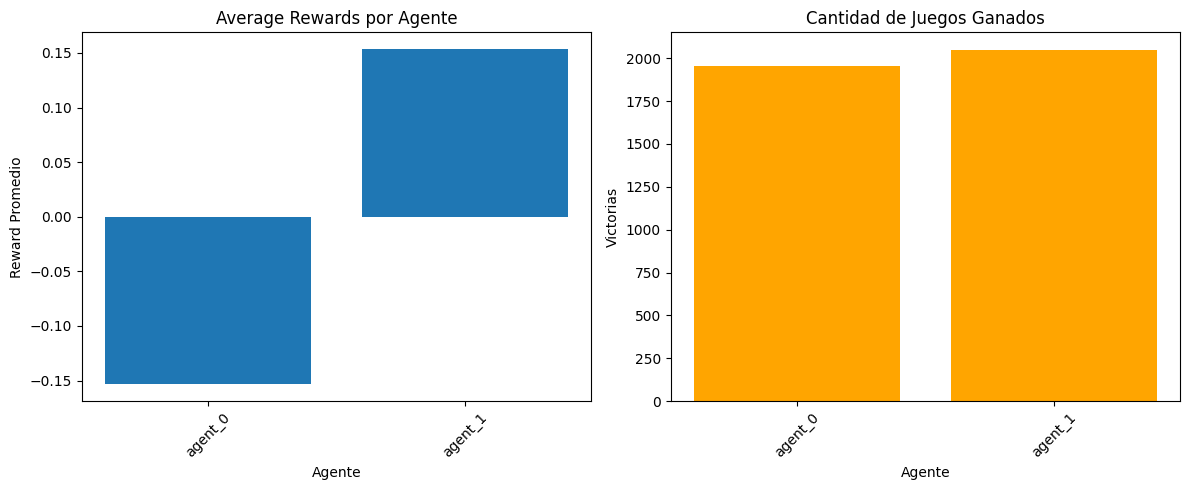

In [34]:
avg_rewards = {agent: cum_rewards[agent] / niter for agent in g.agents}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(avg_rewards.keys(), avg_rewards.values())
axes[0].set_title('Average Rewards por Agente')
axes[0].set_ylabel('Reward Promedio')
axes[0].set_xlabel('Agente')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(wins.keys(), wins.values(), color='orange')
axes[1].set_title('Cantidad de Juegos Ganados')
axes[1].set_ylabel('Victorias')
axes[1].set_xlabel('Agente')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

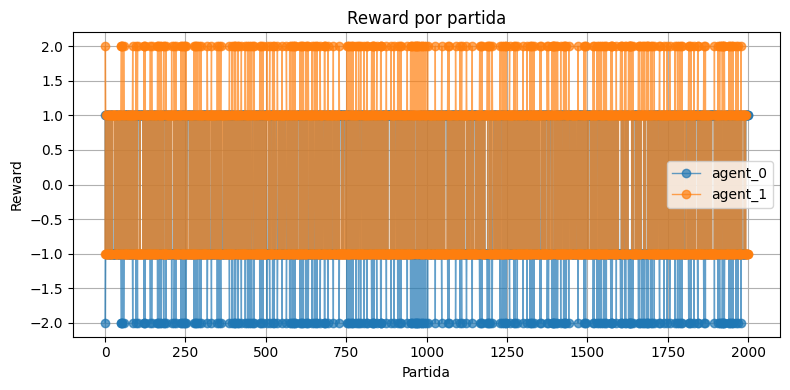

In [35]:
# --- 1) Recompensa por partida ----------------------------------------------
plt.figure(figsize=(8, 4))
for agent, r in rewards_evolution.items():
    plt.plot(r, label=agent, marker='o', linewidth=1, alpha=0.7)
plt.title('Reward por partida')
plt.xlabel('Partida')
plt.ylabel('Reward')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

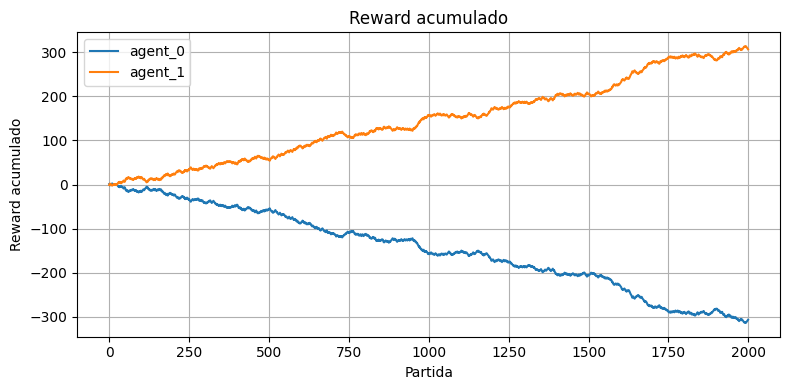

In [37]:
import numpy as np
# --- 2) Reward acumulado -----------------------------------------------------
plt.figure(figsize=(8, 4))
for agent, r in rewards_evolution.items():
    plt.plot(np.cumsum(r), label=agent, linewidth=1.5)
plt.title('Reward acumulado')
plt.xlabel('Partida')
plt.ylabel('Reward acumulado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


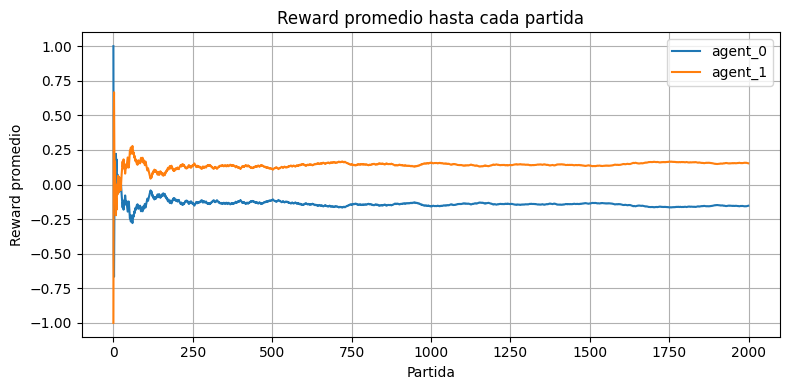

In [38]:
# --- 3) Promedio móvil (running mean) ----------------------------------------
plt.figure(figsize=(8, 4))
for agent, r in rewards_evolution.items():
    cumulative = np.cumsum(r)
    running_mean = cumulative / np.arange(1, len(r) + 1)
    plt.plot(running_mean, label=agent, linewidth=1.5)
plt.title('Reward promedio hasta cada partida')
plt.xlabel('Partida')
plt.ylabel('Reward promedio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
from nbconvert import HTMLExporter
import nbformat, os, time

def save_notebook_to_html(notebook_path=f"KuhnPoker.ipynb"):
    """Guarda el notebook como HTML"""
    exporter = HTMLExporter()
    notebook = nbformat.read(notebook_path, as_version=4)
    html, _ = exporter.from_notebook_node(notebook)
    
    os.makedirs("notebook_exports", exist_ok=True)
    timestamp = time.strftime("%Y%m%d-%H%M%S")
    output_path = f"notebook_exports/KuhnPoker_CFRMvsMiniMax_{timestamp}.html"
    
    with open(output_path, "w") as f:
        f.write(html)
    
    return output_path

In [41]:
save_notebook_to_html()

'notebook_exports/KuhnPoker_CFRMvsMiniMax_20250629-205630.html'